HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

[151, 160, 261, 396]
[151, 160, 261, 396]


<Figure size 432x288 with 0 Axes>

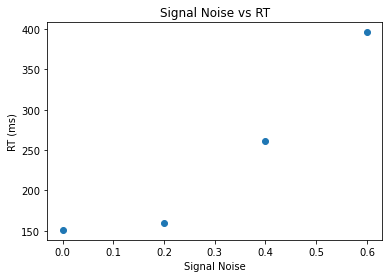

In [23]:
import nengo
import nengo_spa as spa
import matplotlib.pyplot as plt
%matplotlib inline
# with and without seed
import numpy as np
import random
import pickle

d = 128  # the dimensionality of the vectors
# note dimension
SDT_variable = 1
proportion_ablate = 0.0
noise_std = 0.0000005
time_interval = 1.0
wait =  0.0
feedback_synapse = 0.1
fb10 = 0.99      
noise_coef = 0.1
all_numbers = []
xvals = []

plt.figure()

for z in range (0,8,2):
    noise_coef = .1
    signal_noise = z * noise_coef
    noise_coef = z * noise_coef
    
    with spa.Network(seed = None) as model:

            for i in range (0,1):

                noise = nengo.Node(nengo.processes.WhiteNoise(nengo.dists.Gaussian (0,noise_std)), size_out = d)
                timer = time_interval + wait
                vocab = spa.Vocabulary(d)
                vocab.populate('BLUE; RED; GREEN; NOISE')
                GREEN = vocab.parse('GREEN')
                RED = vocab.parse('RED')
                BLUE = vocab.parse('BLUE')
                NOISE = vocab.parse('NOISE')
                NEW_NOISE = i * NOISE
            #make it feedback[0] as loop is out
                Color = spa.State(vocab, feedback = fb10, represent_cc_identity = False)

                nengo.Connection(noise,Color.input, synapse = 0.01)


                def input(t):
                    if t < time_interval:
                        return BLUE + noise_coef * NOISE
                    elif t < timer:
                        return '0'
                    elif t < timer + time_interval:
                        return RED + noise_coef * NOISE
                    elif t < 2 * timer:
                        return '0'
                    elif t < 2 * timer + time_interval:
                        return GREEN + NEW_NOISE
                    elif t < 3 * timer:
                        return '0'
                    else:
                        return NEW_NOISE

                def red_input(t):
                    return RED

                def green_input(t):
                    return GREEN

                def blue_input(t):
                    return BLUE

                input_transcode = spa.Transcode(input, output_vocab = vocab)
                input_transcode >> Color
                probe_Color = nengo.Probe(Color.output, synapse = 0.01)


                with nengo.Simulator(model) as sim:  # Create the simulator
                    for j in range (0, int(d/16)):
                        ens = Color.all_ensembles[j]
                    sim.run(timer*1.5)  
                    numbers  = spa.similarity(sim.data[probe_Color], vocab, normalize = True)
                    numbers_array_0 = np.asarray(numbers)   


                    pickle.dump(numbers_array_0, open("Ablation_0", "wb"))
                    
                                        # Get values where data crosses threshold at different loss percents
                    value = 0.8
                    absolute_val_array = np.abs(numbers[:,1] - value)
                    smallest_difference_index = absolute_val_array.argmin()
                    closest_element = smallest_difference_index - 1000
                    Point = closest_element
                    all_numbers.append(Point) 
                    xvals.append(signal_noise)
                          
print(all_numbers)
  
#------------------------------------------------------------ Generate Scatterplot
plt.figure()
plt.scatter(xvals,all_numbers)
print(all_numbers)
plt.xlabel("Signal Noise")
plt.ylabel("RT (ms)")    
plt.title("Signal Noise vs RT")  
plt.savefig('Signal_Noise.svg')  
plt.savefig('Signal_Noise.png')          
   
